In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [11]:
model = load_model("gender_model_25_32.keras")  #loading a model

In [12]:
classes = ['Male','Female']


In [22]:
#taking image as input and extract faces from faces
image = cv2.imread('test_images/3.jpg')

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

faces = cascade.detectMultiScale(gray_image,1.2,3,minSize=(64,64) , flags=cv2.CASCADE_SCALE_IMAGE)


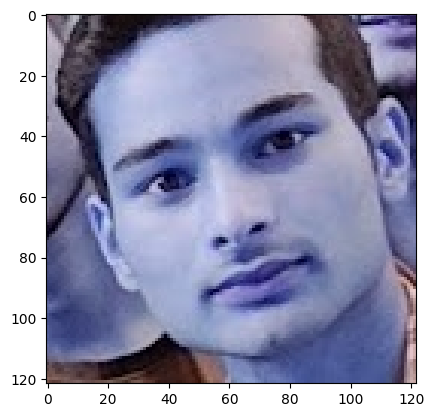

In [23]:
for i, (x, y, w, h) in enumerate(faces):
    # Crop the face region from the image
    face_roi = image[y:y+h, x:x+w]
    
    # Display the individual face
    plt.imshow(face_roi)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
predicted label is = Male
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
predicted label is = Female
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
predicted label is = Male
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
predicted label is = Female
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
predicted label is = Male
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
predicted label is = Male
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
predicted label is = Female
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
predicted label is = Male

Total males detected:5 
Total females detected:3


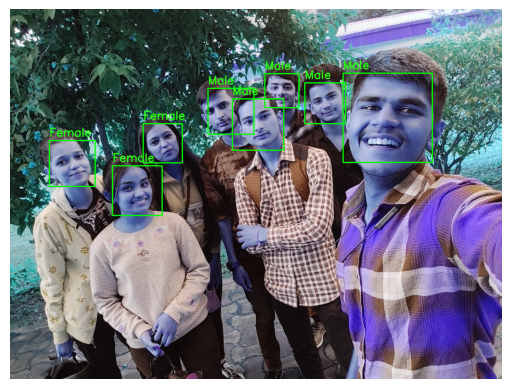

In [24]:
males=0
females=0
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0),2)
   

    cropped_image = np.copy(image[y:y+h,x:x+w])

    ## preprocess the image according to our model
    res_face = cv2.resize(cropped_image, (96,96))
    # print(plt.imshow(res_face))
    res_face = res_face.astype("float") / 255.0
    res_face = img_to_array(res_face)
    res_face = np.expand_dims(res_face, axis=0)

    ## model prediction
    result = model.predict(res_face)[0]

    ## get label with max accuracy
    idx = np.argmax(result)
    label = classes[idx]
    cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    print("predicted label is =",label)

    ## calculating count
    if label=="Female":
        females=females+1
    else:
        males=males+1
plt.imshow(image)
plt.axis('off')

cv2.rectangle(image,(0,0),(300,40),(255,255,255),-1)
cv2.putText(image," females = {},males = {} ".format(females,males),(0,15),
cv2.FONT_HERSHEY_TRIPLEX,0.6,(255, 101, 125),1)
cv2.putText(image," Persons detected = " + str(len(faces)),(10,30),
cv2.FONT_HERSHEY_TRIPLEX,0.5,(0,0,0),1)


cv2.imshow("Gender Detector",image)
cv2.waitKey(0)
if males==0 and females==0:
    print("No faces are detected")
else:
    print(f"\nTotal males detected:{males} \nTotal females detected:{females}")
